Import necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt


LOG.propagate = False

**Connect to the board via BLE**

In [38]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-04-07 23:29:18,187 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:80:25:12:64
2025-04-07 23:29:22,177 | INFO     |: Connected to c0:81:80:25:12:64


In [174]:
ble.send_command(CMD.GET_TOF1, "")
distance1 = int(ble.receive_string(ble.uuid['RX_STRING']))
print(f"Measured distance: {distance1}")


# ble.send_command(CMD.GET_TOF2, "")
# distance1 = int(ble.receive_string(ble.uuid['RX_STRING']))
# print(f"Measured distance: {distance1}")

Exception in callback extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_58436\936155280.py:6
handle: <Handle extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_58436\936155280.py:6>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zhang\AppData\Local\Temp\ipykernel_58436\936155280.py", line 10, in extract_control_data
    speed.append(int(split_str[1]))
                     ~~~~~~~~~^^^
IndexError: list index out of range
Exception in callback extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_58436\936155280.py:6
handle: <Handle extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_58436\936155280.py:6>
Traceback (most recent call last):
  File "C:\Program Fi

Measured distance: 1594


In [177]:
control_timestamps = []
speed = []
distance = []
kalman_distance = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    distance.append(int(split_str[2]))
    kalman_distance.append(float(split_str[3]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

In [176]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [190]:
ble.send_command(CMD.FLIP, "1|255|1|600|20|1200")

2025-04-08 00:23:56,642 | INFO     |: Disconnected from C0:81:80:25:12:64


In [188]:
ble.send_command(CMD.FLIP, "0|255|0|300|20|20")

In [136]:
ble.send_command(CMD.STOP, "")

In [167]:
ble.send_command(CMD.SEND_FLIP_DATA, "")

In [171]:
print(control_timestamps)
print(distance)
print(kalman_distance)

[1979777, 1979777, 1979777, 1979777, 1979777, 1979777, 1979786, 1979786, 1979786, 1979786, 1979786, 1979786, 1979804, 1979804, 1979804, 1979804, 1979804, 1979804, 1979823, 1979823, 1979823, 1979823, 1979823, 1979823, 1979839, 1979839, 1979839, 1979839, 1979839, 1979839, 1979850, 1979850, 1979850, 1979850, 1979850, 1979850, 1979867, 1979867, 1979867, 1979867, 1979867, 1979867, 1979883, 1979883, 1979883, 1979883, 1979883, 1979883, 1979899, 1979899, 1979899, 1979899, 1979899, 1979899, 1979910, 1979910, 1979910, 1979910, 1979910, 1979910, 1979921, 1979921, 1979921, 1979921, 1979921, 1979921, 1979933, 1979933, 1979933, 1979933, 1979933, 1979933, 1979952, 1979952, 1979952, 1979952, 1979952, 1979952, 1979973, 1979973, 1979973, 1979973, 1979973, 1979973, 1979984, 1979984, 1979984, 1979984, 1979984, 1979984, 1979995, 1979995, 1979995, 1979995, 1979995, 1979995, 1980011, 1980011, 1980011, 1980011, 1980011, 1980011, 1980027, 1980027, 1980027, 1980027, 1980027, 1980027, 1980044, 1980044, 1980044, 

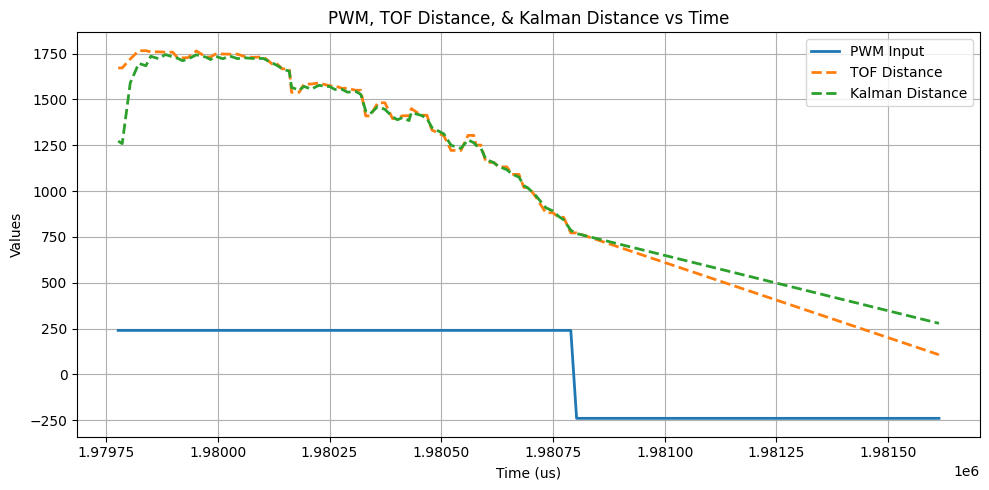

In [173]:

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(control_timestamps, speed, label='PWM Input', linewidth=2)
plt.plot(control_timestamps, distance, label='TOF Distance', linestyle='--', linewidth=2)
plt.plot(control_timestamps, kalman_distance, label='Kalman Distance', linestyle='--', linewidth=2)

# Labeling
plt.title('PWM, TOF Distance, & Kalman Distance vs Time')
plt.xlabel('Time (us)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [355]:
control_timestamps = []
i_err = []
p_err = []
speed = []
distance = []
dt = []

tof_available = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    p_err.append(int(split_str[2]))
    i_err.append(int(split_str[3]))
    distance.append(int(split_str[4]))
    dt.append(int(split_str[5]))
    tof_available.append(int(split_str[6]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

In [357]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [335]:
# packet should be in the form of "P_GAIN|I_GAIN|MAX_SPEED|TARGET_TOF|TIMING_BUDGET|RUN TIME"
ble.send_command(CMD.FORWARD_CONTROLLED, "0.03|0.000001|80|300|20|10000")

2025-03-26 14:00:44,371 | INFO     |: Disconnected from C0:81:80:25:12:64


In [ ]:
ble.send_command(CMD.FORWARD_EXTRAPOLATE, "0.1|0.00001|80|360|20|10000")

In [389]:
ble.send_command(CMD.BACKWARD, "255")

In [ ]:
ble.send_command(CMD.SEND_PID_DATA, "")

In [173]:
ble.send_command(CMD.FORWARD, "80|160|1")

In [174]:
ble.send_command(CMD.STOP, "0")

In [ ]:
print("timestamps:")
print(control_timestamps)
print("speed:")
print(speed)
print("p err:")
print(p_err)
print("i err:")
print(i_err)
print("distance")
print(distance)
print("data available:")
print(tof_available)
print("dt: ")
print(dt)




In [ ]:
import csv
# Define the CSV filename
filename = ".csv"

# Save to CSV
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(["Timestamps", "Speed", "P Error", "I Error", "Distance", "Data Available", "dt"])
    
    # Write the data rows
    for i in range(len(control_timestamps)):  # Assuming all lists have the same length
        writer.writerow([
            control_timestamps[i], 
            speed[i], 
            p_err[i], 
            i_err[i], 
            distance[i], 
            tof_available[i], 
            dt[i]
        ])

print(f"Data saved to {filename} successfully!")

In [9]:
import csv

# Define the CSV filename
filename = "80_pid.csv"

# Initialize lists to hold each column of data
control_timestamps = []
speed = []
p_err = []
i_err = []
distance = []
tof_available = []
dt = []

# Read from the CSV
with open(filename, mode="r") as file:
    reader = csv.reader(file)
    
    # Skip the header
    next(reader)

    # Read each row
    for row in reader:
        control_timestamps.append(float(row[0]))
        speed.append(float(row[1]))
        p_err.append(float(row[2]))
        i_err.append(float(row[3]))
        distance.append(float(row[4]))
        tof_available.append(row[5].strip().lower() == 'true')  # Convert to bool
        dt.append(float(row[6]))

print("Data successfully extracted from CSV!")

Data successfully extracted from CSV!


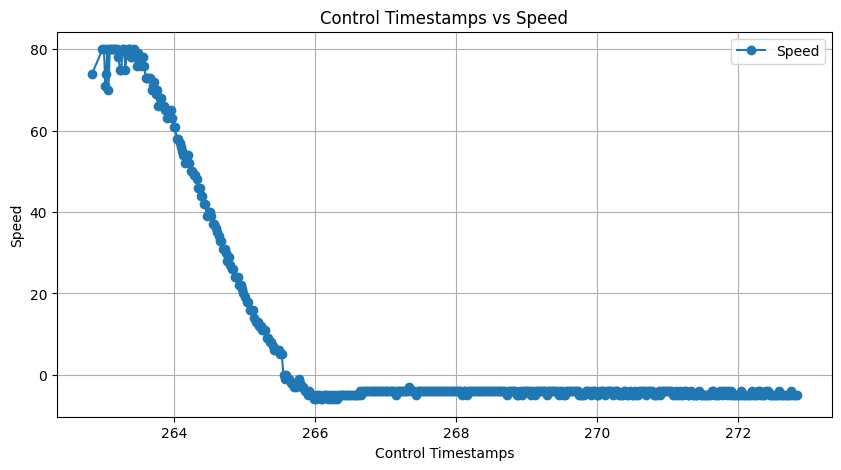

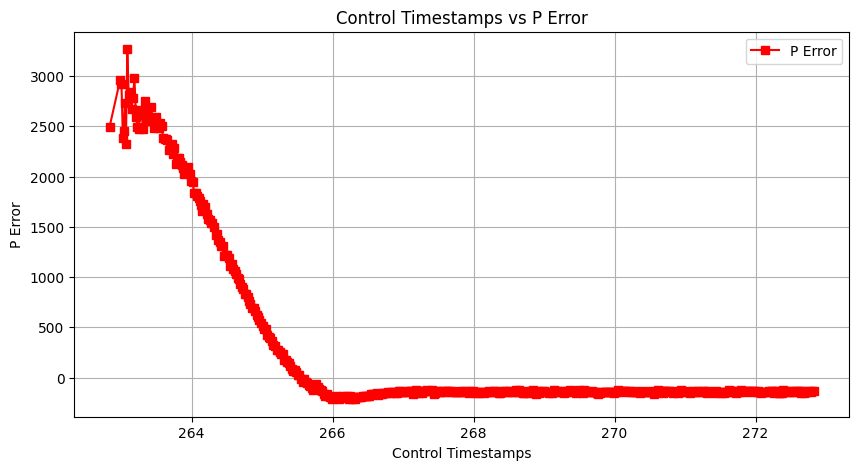

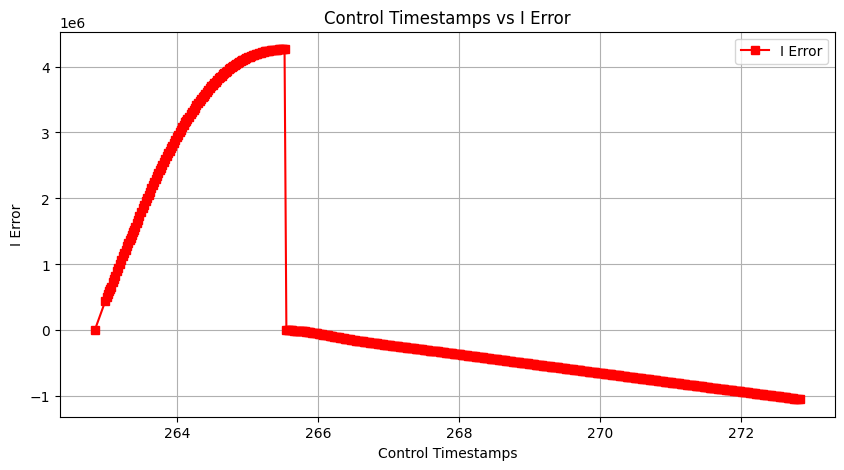

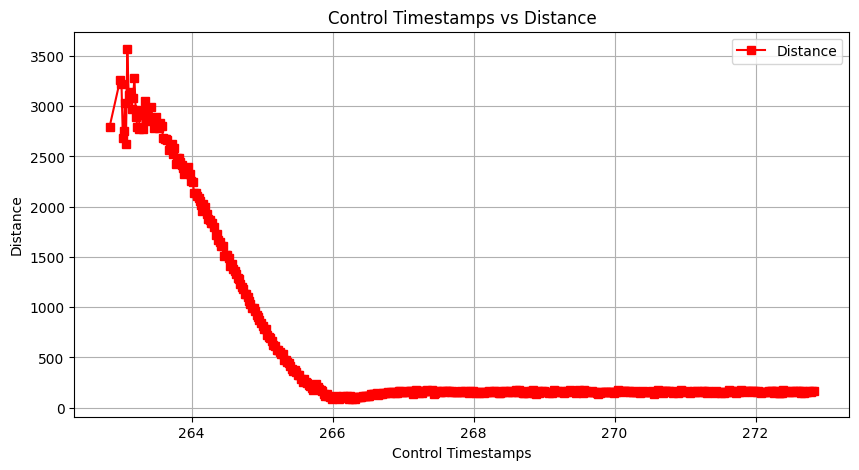

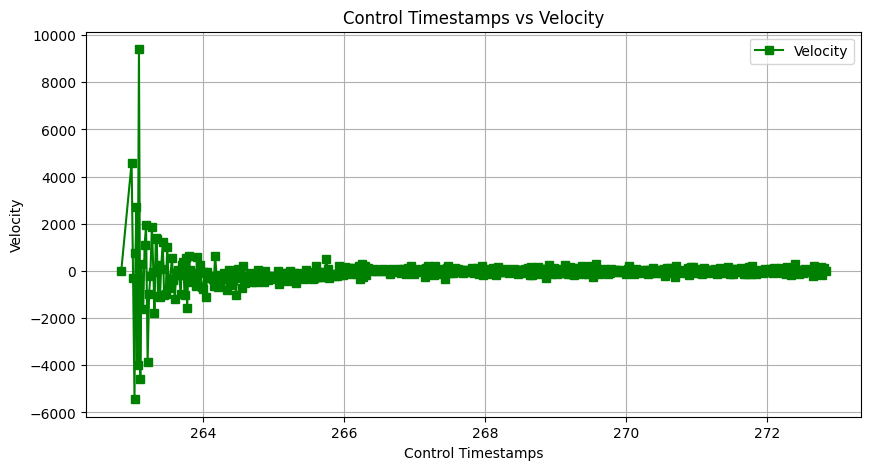

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Convert lists to numpy arrays for better performance
control_timestamps = np.array(control_timestamps)

second_timestamps = control_timestamps / 1000 - 26.5
speed = np.array(speed)
p_err = np.array(p_err)
i_err = np.array(i_err)
distance = np.array(distance)

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. p_err
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, p_err, marker='s', linestyle='-', label='P Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('P Error')
plt.title('Control Timestamps vs P Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. i_err
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, i_err, marker='s', linestyle='-', label='I Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('I Error')
plt.title('Control Timestamps vs I Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. distance
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, distance, marker='s', linestyle='-', label='Distance', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('Distance')
plt.title('Control Timestamps vs Distance')
plt.legend()
plt.grid(True)
plt.show()


# Calculate velocity (rate of change of distance with respect to time)
# Use np.diff to compute the differences, and np.diff(control_timestamps) to find the time intervals
velocity = np.diff(distance) / 0.100

# Append a 0 to the velocity array to match the size of the original data
velocity = np.insert(velocity, 0, 0)  # Assuming 0 velocity at the start (or use another method if preferred)

# Plot control timestamps vs velocity
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, velocity, marker='s', linestyle='-', label='Velocity', color='g')
plt.xlabel('Control Timestamps')
plt.ylabel('Velocity')
plt.title('Control Timestamps vs Velocity')
plt.legend()
plt.grid(True)
plt.show()

**Finding d and m**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Identify the linear region (adjust indices as needed)
# For example, let's say the linear region is between the 10th and 20th data points
start_index = 19
end_index = 24

second_timestamps = control_timestamps / 1000 - 26.5
# Extract the relevant portion of the distance and timestamps data
linear_x_data = second_timestamps[start_index:end_index]
linear_y_data = distance[start_index:end_index]

# Perform linear regression (fit a line to the linear region)
slope, intercept, r_value, p_value, std_err = stats.linregress(linear_x_data, linear_y_data)

# Generate the fitted line
x_fit = np.linspace(min(linear_x_data), max(linear_x_data), 1000)
y_fit = slope * x_fit + intercept

# Plot the data and the linear fit
plt.figure(figsize=(10, 5))
plt.plot(second_timestamps, distance, label="Distance Data", color="blue", linestyle="--")
plt.plot(x_fit, y_fit, label=f"Linear Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.scatter(linear_x_data, linear_y_data, color="green", label="Linear Region Data")
plt.xlabel('Control Timestamps')
plt.ylabel('Distance')
plt.title('Linear Fit on Distance Data')
plt.legend()
plt.grid(True)
plt.show()

# Print the linear fit parameters
print(f"Linear Fit Parameters: Slope = {slope}, Intercept = {intercept}")


**Calculating d and m**

In [18]:
import math
u = 1
x_dot = 2681
d = u / x_dot

t_90 = 1.9
m = -d * t_90 / math.log(0.1)

print(f"d = {d}")
print(f"m = {m}")

d = 0.0003729951510630362
m = 0.0003077804981783583


**Discretizing Matrices**

In [19]:
A = np.array([[0, 1], [0, -d/m]])
B = np.array([[0, 1/m]])
C = np.array([[-1, 0]])

Delta_T = 0.01
Ad = np.eye(2) + Delta_T * A  # n is the dimension of your state space 
Bd = Delta_T * B

print(B)
print("Ad = ")
print(Ad)
print("Bd = ")
print(Bd)

[[   0.        3249.0687549]]
Ad = 
[[1.         0.01      ]
 [0.         0.98788113]]
Bd = 
[[ 0.         32.49068755]]


**Kalman Filter Implementation**

In [11]:
x_0 = np.array([[distance[0]], [0]])

sigma_1 = 31.62 # pos std dev
sigma_2 = 31.62 # speed std dev
sigma_3 = 10 # tof noise
sig_u=np.array([[sigma_1**2,0],[0,sigma_2**2]]) # We assume uncorrelated noise, and therefore a diagonal matrix works.
sig_z=np.array([[sigma_3**2]])


In [13]:
def kf(mu,sigma,u,y):
    mu_p = Ad.dot(mu) + Bd.dot(u) 
    sigma_p = Ad.dot(sigma.dot(Ad.transpose())) + sig_u
    
    sigma_m = C.dot(sigma_p.dot(C.transpose())) + sig_z
    kkf_gain = sigma_p.dot(C.transpose().dot(np.linalg.inv(sigma_m)))
    y_m = y-C.dot(mu_p)
    mu = mu_p + kkf_gain.dot(y_m)    
    sigma=(np.eye(2)-kkf_gain.dot(C)).dot(sigma_p)
    return mu,sigma

# Initial state mean and covariance
x = np.array([[distance[0]], [0]])
sig = np.array([[25**2, 0], [0, 25**2]])
pwm_scale = [pwm/80.0 for pwm in speed]

# Run KF
kf_data = []
for pwm, tof in zip(pwm_scale, distance):
    x, sig = kf(x, sig, pwm, -tof)
    kf_data.append(x)

kf = [arr[0, 0] for arr in kf_data]

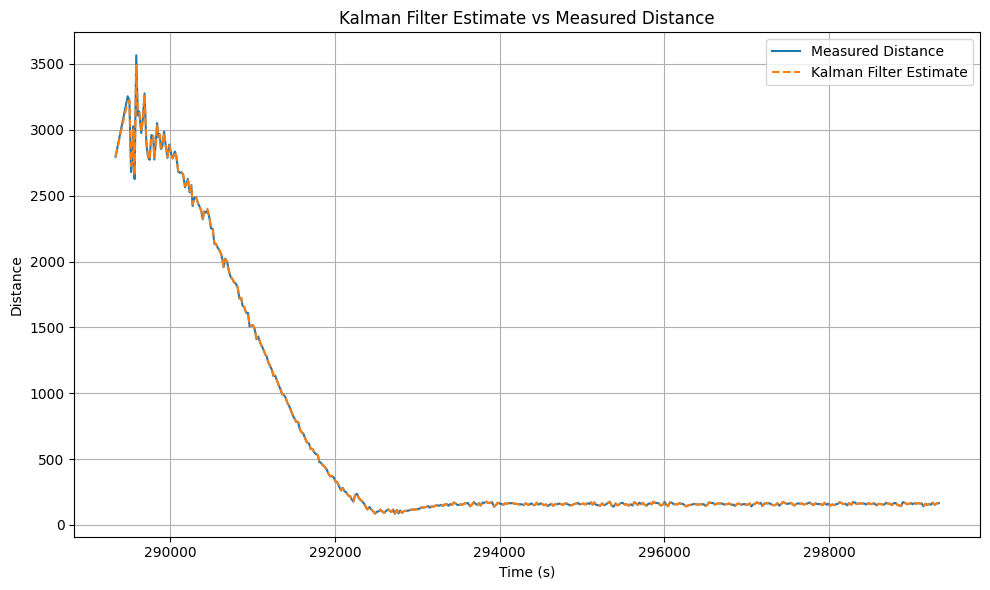

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(control_timestamps, distance, label='Measured Distance')
plt.plot(control_timestamps, kf, label='Kalman Filter Estimate', linestyle="--")
plt.xlabel('Time (s)')
plt.ylabel('Distance')
plt.title('Kalman Filter Estimate vs Measured Distance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [725]:
ble.send_command(CMD.KALMAN_CONTROL, "1|0.05|0.000001|110|300|20")

In [726]:
ble.send_command(CMD.KALMAN_CONTROL, "0|0|0|100|300|20")

In [727]:
# ble.stop_notify(ble.uuid['RX_STRING'])

control_timestamps = []
speed = []
p_err = []
i_err = []
distance = []
kalman_distance = []
dt = []

tof_available = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    p_err.append(int(split_str[2]))
    i_err.append(float(split_str[3]))
    distance.append(int(split_str[4]))
    kalman_distance.append(float(split_str[5]))
    dt.append(int(split_str[6]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

In [724]:
ble.send_command(CMD.RECORD_PID_DATA, "1")

In [561]:
ble.send_command(CMD.RECORD_PID_DATA, "0")

In [728]:
ble.send_command(CMD.SEND_PID_DATA, "")

In [713]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [731]:
print("control timestamps")
print(control_timestamps)
print("speed")
print(speed)
print("p error")
print(p_err)
print("i error")
print(i_err)
print("tof distance")
print(distance)
print("kalman distance")
print(kalman_distance)
print("dt")
print(dt)

control timestamps
[59565, 59711, 59728, 59739, 59750, 59762, 59767, 59780, 59785, 59791, 59802, 59808, 59813, 59826, 59837, 59851, 59858, 59863, 59869, 59880, 59886, 59897, 59909, 59920, 59934, 59941, 59952, 59966, 59973, 59984, 59999, 60004, 60010, 60015, 60023, 60028, 60041, 60052, 60063, 60074, 60090, 60096, 60101, 60112, 60120, 60125, 60131, 60136, 60142, 60153, 60158, 60164, 60171, 60182, 60188, 60193, 60204, 60212, 60217, 60223, 60235, 60240, 60253, 60258, 60264, 60278, 60289, 60294, 60300, 60305, 60310, 60321, 60329, 60334, 60340, 60345, 60351, 60362, 60373, 60383, 60399, 60408, 60413, 60419, 60424, 60430, 60437, 60442, 60448, 60463, 60468, 60479, 60485, 60492, 60497, 60503, 60518, 60523, 60529, 60534, 60542, 60547, 60560, 60571, 60587, 60598, 60609, 60621, 60626, 60632, 60644, 60649, 60655, 60667, 60671, 60687, 60698, 60709, 60715, 60722, 60733, 60744, 60749, 60755, 60760, 60766, 60776, 60782, 60787, 60800, 60811, 60825, 60832, 60843, 60857, 60864, 60875, 60882, 60887, 60900, 

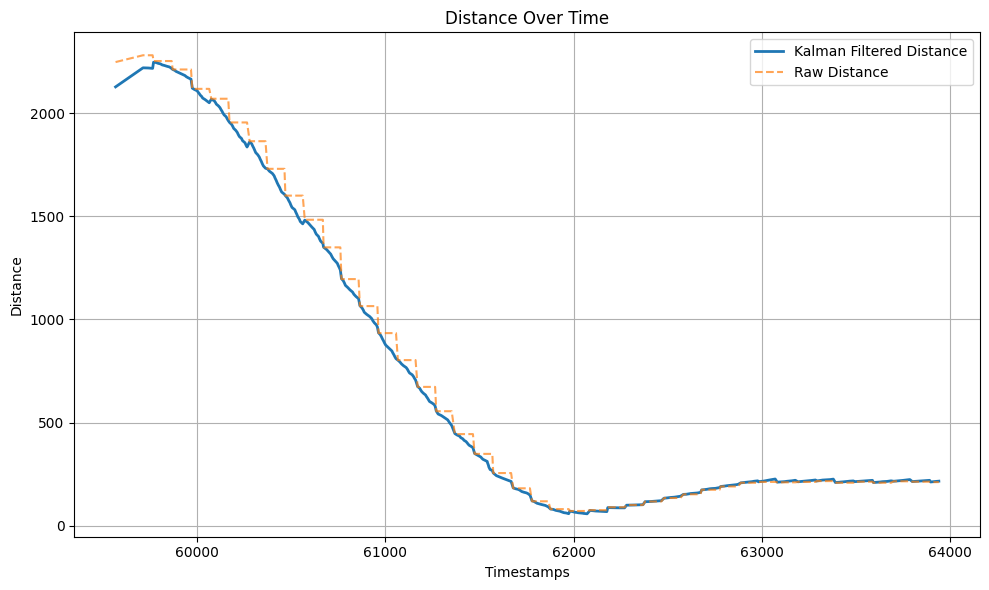

In [732]:
import matplotlib.pyplot as plt

def plot_kalman_vs_raw(control_timestamps, kalman_distance, distance):
    """
    Plots Kalman-filtered distance and raw distance against control timestamps.

    Parameters:
    - control_timestamps: array-like of timestamps (x-axis)
    - kalman_distance: array-like of filtered distance values
    - distance: array-like of raw distance values
    """
    plt.figure(figsize=(10, 6))
    
    plt.plot(control_timestamps, kalman_distance, label='Kalman Filtered Distance', linewidth=2)
    plt.plot(control_timestamps, distance, label='Raw Distance', linestyle='--', alpha=0.7)

    plt.title("Distance Over Time")
    plt.xlabel("Timestamps")
    plt.ylabel("Distance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# print(len(control_timestamps))
# print(len(kalman_distance))
# print(len(distance))
plot_kalman_vs_raw(control_timestamps, kalman_distance, distance)

In [ ]:
control_yaw_timestamps = []
speed = []
p_err = []
d_err = []
yaw = []
dt = []

tof_available = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_yaw_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    p_err.append(int(split_str[2]))
    d_err.append(float(split_str[3]))
    yaw.append(float(split_str[4]))
    dt.append(int(split_str[5]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

In [733]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Save to CSV
filename = "110_pwm_kalman_filter.csv"
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["time", "speed", "p_error", "i_error", "tof_distance", "kalman_distance", "dt"])
    for i in range(len(control_timestamps)):
        writer.writerow([
            control_timestamps[i],
            speed[i],
            p_err[i],
            i_err[i],
            distance[i],
            kalman_distance[i],
            dt[i]
        ])

print(f"Data saved to {filename}")

Data saved to 110_pwm_kalman_filter.csv
2025-03-26 16:20:18,516 | INFO     |: Disconnected from C0:81:80:25:12:64


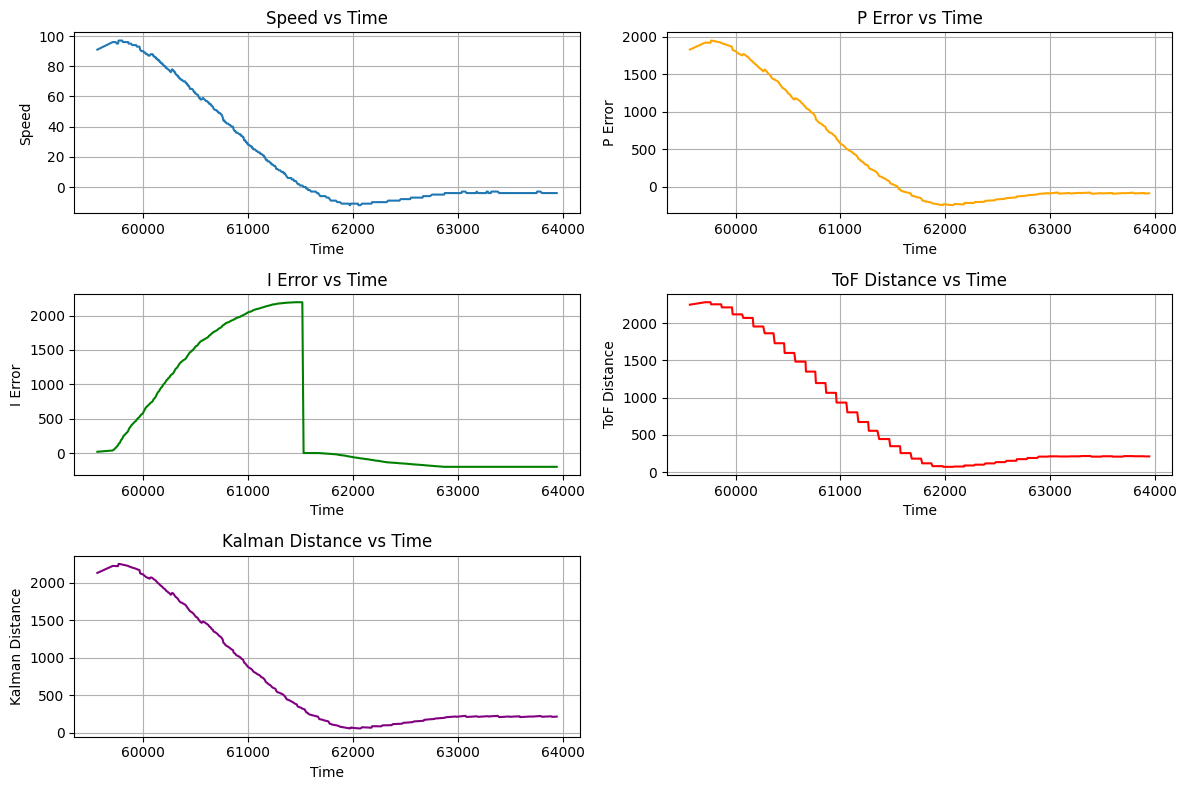

In [736]:

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(control_timestamps, speed, label='Speed')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs Time')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(control_timestamps, p_err, label='P Error', color='orange')
plt.xlabel('Time')
plt.ylabel('P Error')
plt.title('P Error vs Time')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(control_timestamps, i_err, label='I Error', color='green')
plt.xlabel('Time')
plt.ylabel('I Error')
plt.title('I Error vs Time')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(control_timestamps, distance, label='ToF Distance', color='red')
plt.xlabel('Time')
plt.ylabel('ToF Distance')
plt.title('ToF Distance vs Time')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(control_timestamps, kalman_distance, label='Kalman Distance', color='purple')
plt.xlabel('Time')
plt.ylabel('Kalman Distance')
plt.title('Kalman Distance vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()


Start Yaw Control

In [ ]:
# packet should be in the form of "yaw_control?|target_yaw_value|max_clockwise_speed|min_clockwise_speed|max_counter_clockwise_speed|min_counter_clockwise_speed|P_GAIN|D_GAIN|alpha"
ble.send_command(CMD.YAW_CONTROL, "1|90|250|80|250|80|8|0.7|0.1")

Start Recording Data

In [ ]:
ble.send_command(CMD.RECORD_PID_DATA, "1")

Stop Recording Data

In [ ]:
ble.send_command(CMD.RECORD_PID_DATA, "0")

Stop Yaw Control

In [ ]:
ble.send_command(CMD.YAW_CONTROL, "0|2|60|20|60|20|30")
ble.send_command(CMD.STOP, "")

In [ ]:
print("timestamps:")
print(control_yaw_timestamps)
print("speed:")
print(speed)
print("p err:")
print(p_err)
print("d_err:")
print(d_err)
print("yaw:")
print(yaw)
print("dt: ")
print(dt)


**Sampling Rate Analysis**

We are logging dt, the time in between control loop executions. We can find the mean of our dt values to find the frequency at which our loop executes

In [ ]:
mean_dt = np.mean(dt)
print(f"Average time between control loop executions {mean_dt} ms")
print(f"Control loop execution frequency {1 / (mean_dt * 10e-3)} Hz")


In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [ ]:
ble.send_command(CMD.TURN_RIGHT, "150|200")

In [ ]:
ble.send_command(CMD.STOP, "")

In [ ]:
ble.send_command(CMD.TURN_LEFT, "150|250")

In [ ]:
ble.send_command(CMD.STOP, "")

In [ ]:
# Convert lists to numpy arrays for better performance
control_yaw_timestamps = np.array(control_yaw_timestamps)
speed = np.array(speed)
p_err = np.array(p_err)
d_err = np.array(d_err)
yaw = np.array(yaw)

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. p_err
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, p_err, marker='s', linestyle='-', label='P Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('P Error')
plt.title('Control Timestamps vs P Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. d_err
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, d_err, marker='s', linestyle='-', label='D Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('D Error')
plt.title('Control Timestamps vs D Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. yaw
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, yaw, marker='s', linestyle='-', label='Yaw', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('Yaw')
plt.title('Control Timestamps vs Yaw')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find the index of the value closest to 42500 in control_yaw_timestamps
# index_42500 = np.searchsorted(control_yaw_timestamps, 42500)

# Slice the arrays up to this index
truncated_timestamps = control_yaw_timestamps[1:]
speed = speed[1:]

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(truncated_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()

**Lab 7 BEGIN**

Plotting sensor_data.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
csv_file_path = "sensor_data.csv"
df = pd.read_csv(csv_file_path)

# Filter data to only include timestamps >= 1.825e6
df_filtered = df[df["Timestamps"] >= 1.825e6]

# Extract relevant columns
time = df_filtered["Timestamps"]
speed = df_filtered["Speed"]
distance = df_filtered["Distance"]
dt = df_filtered["dt"]

# Plot PWM (Speed) vs Time
plt.figure(figsize=(10, 5))
plt.plot(time, speed, label="PWM (Speed)", color="blue")
plt.xlabel("Time")
plt.ylabel("Speed (PWM)")
plt.title("PWM (Speed) vs Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Distance vs Time
plt.figure(figsize=(10, 5))
plt.plot(time, distance, label="Distance", color="red")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.title("Distance vs Time")
plt.legend()
plt.grid(True)
plt.show()

# Compute velocity (rate of change of distance) and plot Velocity vs Time
df_filtered["Velocity"] = distance.diff() / df_filtered["dt"].replace(0, 1)  # Avoid division by zero

plt.figure(figsize=(10, 5))
plt.plot(time, df_filtered["Velocity"], label="Velocity", color="green")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install pandas